In [1]:
import pandas as pd

In [2]:
df = pd.read_json('data.json')
df

,companyName,companySize,tagline,title,details
0,Recurate | Resale Made Easy,11-50 EMPLOYEES,Recurate enables a beautifully integrated resa...,Brand Success Manager,Remote possible • $60k – $85k
1,batelle.com,11-50 EMPLOYEES,Teach parents how to put their children to bed...,Senior Sales Consultant,Remote possible • $45k – $65k
2,Stellic,11-50 EMPLOYEES,Powering the path to graduation,"VP, Sales",San Francisco Bay Area • Remote possible • $28...
3,Stellic,11-50 EMPLOYEES,Powering the path to graduation,Head of Partner Success,San Francisco • Remote possible • $110k – $170...
4,Stellic,11-50 EMPLOYEES,Powering the path to graduation,Head of Marketing,San Francisco • San Francisco Bay Area • Remot...
...,...,...,...,...,...
282,isee ai,11-50 EMPLOYEES,An ai platform focused on building the road to...,Principal Perception Engineer,Boston • Cambridge • Remote possible • $160k –...
283,isee ai,11-50 EMPLOYEES,An ai platform focused on building the road to...,Service Desk Lead,Boston • Cambridge • Remote possible
284,isee ai,11-50 EMPLOYEES,An ai platform focused on building the road to...,Staff Test Engineer - Testing Tools and Methods,Boston • Cambridge • Remote possible • $75k – ...
285,Kisi,51-200 EMPLOYEES,Modern door security for facilities where the ...,Business Development Representative (Junior Sa...,Brooklyn • Remote possible • $50k – $60k • No ...


In [3]:
_deepnote_run_altair(df, """{"$schema":"https://vega.github.io/schema/vega-lite/v4.json","mark":{"type":"bar","tooltip":{"content":"data"}},"height":220,"autosize":{"type":"fit"},"data":{"name":"placeholder"},"encoding":{"x":{"field":"companySize","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}},"y":{"field":"COUNT(*)","type":"quantitative","sort":null,"aggregate":"count","scale":{"type":"linear","zero":true}},"color":{"field":"","type":"nominal","sort":null,"scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

In [4]:
#define company size
df['sizeCategory'] = df.companySize.replace({
    '1-10 EMPLOYEES': 'Small',
    '11-50 EMPLOYEES': 'Medium',
    '51-200 EMPLOYEES': 'Large',
    '201-500 EMPLOYEES': 'X-Large'})

In [5]:
#count unique companies
unique_df = df.drop_duplicates('companyName')

In [6]:
#Visualize company and job counts
order = ['Small', 'Medium', 'Large', 'X-Large']
combined = pd.DataFrame({
    'Company count': unique_df.sizeCategory.value_counts().reindex(order),
    'Job count': df.sizeCategory.value_counts().reindex(order)}).reset_index().rename({'index': 'Company size'})

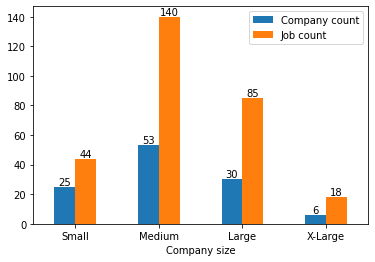

In [7]:
plot = combined.rename(columns={'index': 'Company size'}).plot.bar(x='Company size', y=['Company count', 'Job count'], rot=0)
for container in plot.containers:
    plot.bar_label(container)

In [8]:
plot.get_figure().savefig('figure1.png', dpi=400)

In [9]:
#check how many jobs have specified salary
df.details.map(lambda x: '$' in x).value_counts() / (253 + 34)

True     0.881533
False    0.118467
Name: details, dtype: float64

In [10]:
#check how many jobs have specified location
def has_location(det):
    return det == 'San Francisco' or det == 'Los Angeles' or (('•' in det or ('• Remote possible' in det)) and not det.startswith('Remote possible'))
# has location city plus remote possible
# not only remote possible 
# not empty


df['located'] = df.details.map(has_location)
list(df[df['located']].details)

['San Francisco Bay Area • Remote possible • $280k – $360k • 0.25% – 0.5%',
 'San Francisco • Remote possible • $110k – $170k • 0.1% – 0.4%',
 'San Francisco • San Francisco Bay Area • Remote possible • $125k – $200k • 0.2% – 0.6%',
 'New York City • London • New York • Remote possible • $250k – $330k • 1.0% – 3.0%',
 'California • Los Angeles • New York City • Remote possible • $80k – $150k • 1.0% – 5.0%',
 'Los Angeles • San Francisco • London • Remote possible • $60k – $80k • 1.0% – 3.0%',
 'Palo Alto • $250k – $320k • 0.5% – 1.0%',
 'Palo Alto • $150k – $180k • 0.1% – 0.1%',
 'Palo Alto • $200k – $240k • 0.1% – 0.2%',
 'New York City • Brooklyn • San Francisco Bay Area • $130k – $180k • 1.0% – 1.5%',
 'New York City • San Francisco Bay Area • $170k – $210k • 1.0% – 2.5%',
 'San Francisco Bay Area • Remote possible • $150k – $200k • 0.06% – 0.075%',
 'San Francisco Bay Area • Remote possible • $105k – $140k • 0.016% – 0.02%',
 'San Francisco Bay Area • Remote possible • $150k – $185

In [11]:
list(df[~df.located].details)

['Remote possible • $60k – $85k',
 'Remote possible • $45k – $65k',
 'Remote possible',
 'Remote possible • $68k – $100k',
 'Remote possible',
 'Remote possible • $80k – $120k • No equity',
 '',
 '',
 'Remote possible • $60k – $85k',
 'Remote possible • $45k – $65k',
 'Remote possible',
 'Remote possible • $68k – $100k',
 'Remote possible',
 'Remote possible • $80k – $120k • No equity',
 '',
 '',
 'Remote possible • $60k – $85k',
 'Remote possible • $45k – $65k',
 'Remote possible',
 'Remote possible • $68k – $100k',
 'Remote possible',
 'Remote possible • $80k – $120k • No equity']

In [12]:
df.located.value_counts() / (265 + 22)

True     0.923345
False    0.076655
Name: located, dtype: float64

In [13]:
#Brainstorming how to categorize technical vs managerial 
# engineering wordset ['engineer', 'programmer', 'developer', 'scientist', 'architect']
# manager wordset ['chief', 'head of', 'vp ', 'vice president', 'manager', 'director', 'lead']
# ENGINEERING MANAGER must have '
# ENGINEER iff has 'engineer' then engineer

[s for s in list(df.title)]

['Brand Success Manager',
 'Senior Sales Consultant',
 'VP, Sales',
 'Head of Partner Success',
 'Head of Marketing',
 'VP of Sales for Global B2B Marketplace (AI Tech Real Estate)',
 'Software Developer required for Global B2B Marketplace (AI/ML Tech Real Estate)',
 'Marketing Manager sought for Global B2B Marketplace (AI Tech Real Estate)',
 'VP Marketing',
 'Director of Product Marketing',
 'Staff Data Engineer - Product Development',
 'Head of Marketing',
 'Senior Software Engineer (early hire)',
 'Director, Product Operations',
 'Sr. Information Security Manager',
 'Sr. Product Manager',
 'Design Director',
 'Sales Development Representative',
 'Lead Backend Engineer - Integrations',
 'Senior Software Engineer - Full Stack',
 'Lead Engineer, SRE (Remote)',
 'Senior Mobile Engineer',
 'Sr. Director of Brand Strategy- Remote within the US or In Office (PA, CA, UT)',
 'Senior Product Designer UX/UI - Remote within the US or In Office',
 'UX Designer - Remote within the US or In Offic

In [14]:
#formal categorization starts here
df['Manager'] = df['title'].map(lambda title: any(word in title.lower() for word in ['chief', 'head of', 'vp ', 'vice president', 'mangager', 'manager', 'director', 'lead', 'cto']))
df['Technical'] = df['title'].map(lambda title: any(word in title.lower() for word in ['engineer', 'programmer', 'developer', 'scientist', 'architect', 'cto', 'software development']))

In [15]:
df['Technical'] = df['Technical'].map(int)
df['Manager'] = df['Manager'].map(int)
df['Technical Manager'] = df['Technical'] * df['Manager']
df['Only Technical'] = (df['Technical'] == 1) & (df['Manager'] == 0)
df['Only Manager'] = (df['Technical'] == 0) & (df['Manager'] == 1)
df['Neither'] = (df['Manager'] == 0) & (df['Technical'] == 0)

df['Company size'] = df['companySize'].replace({
    '1-10 EMPLOYEES': 5,
    '11-50 EMPLOYEES': 35,
    '51-200 EMPLOYEES': 125,
    '201-500 EMPLOYEES': 350})

In [16]:
#Visualize categorization results
plot_df = df.groupby(['Company size']).mean()
plot_df['Non-technical'] = 1 - plot_df['Technical']
plot_df['Non-manager'] = 1 - plot_df['Manager']
plot_df *= 100
plot_df.rename(columns={'Neither': 'Non-technical Non-manager'}, inplace=True)
plot_df

,located,Manager,Technical,Technical Manager,Only Technical,Only Manager,Non-technical Non-manager,Non-technical,Non-manager
Company size,,,,,,,,,
5,93.181818,22.727273,52.272727,4.545455,47.727273,18.181818,29.545455,47.727273,77.272727
35,93.571429,37.857143,40.714286,11.428571,29.285714,26.428571,32.857143,59.285714,62.142857
125,91.764706,37.647059,36.470588,9.411765,27.058824,28.235294,35.294118,63.529412,62.352941
350,83.333333,50.000000,44.444444,5.555556,38.888889,44.444444,11.111111,55.555556,50.000000


In [17]:
plot_df = plot_df.rename(index={5: 'Small', 35: 'Medium', 125: 'Large', 350: 'X-Large'})

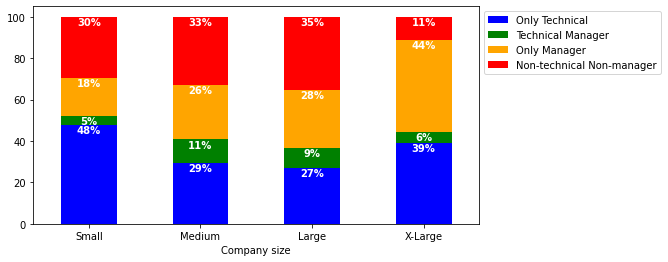

In [18]:
# plot_df['only-manager'] + plot_df['only-technical'] + plot_df['technical-manager'] + plot_df['neither']
lgd = plot_df.plot.bar(
    y=['Only Technical', 'Technical Manager', 'Only Manager', 'Non-technical Non-manager'],
    stacked=True, figsize=(8, 4), color=['blue', 'green', 'orange', 'red'],
    rot=0
    )

    

y_offset = -4
for bar in lgd.patches:
  lgd.text(
      # Put the text in the middle of each bar. get_x returns the start
      # so we add half the width to get to the middle.
      bar.get_x() + bar.get_width() / 2,
      # Vertically, add the height of the bar to the start of the bar,
      # along with the offset.
      bar.get_height() + bar.get_y() + y_offset,
      # This is actual value we'll show.
      str(round(bar.get_height())) + '%',
      # Center the labels and style them a bit.
      ha='center',
      color='w',
      weight='bold',
      size=10
  )

  lgdbbox = lgd.legend(bbox_to_anchor=(1.0, 1.0))

  lgdbbox.figure.savefig('figure2.png', dpi=400, bbox_extra_artists=(lgd,), bbox_inches='tight')

In [19]:
#output results file
df.to_csv('SoftwareS.csv', encoding='utf-8', index=False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5068e12e-86d4-41ab-999f-eafdd444beb8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>